In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [52]:
# name columns and insert when loading csv file
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [53]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [54]:
# changing class column to int, where g = 1 and h = 0
df['class'] = (df['class'] == "g").astype(int)

In [55]:
# Check to see that it worked
# df.sample(4)
df.head()
# df.tail()
# df.info()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


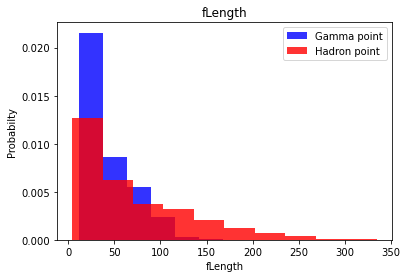

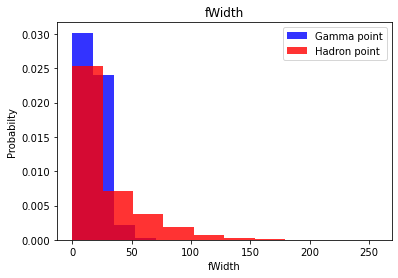

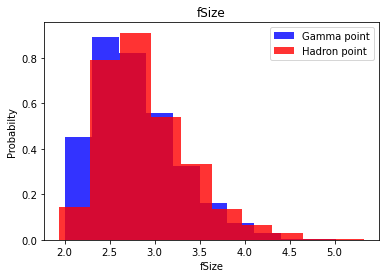

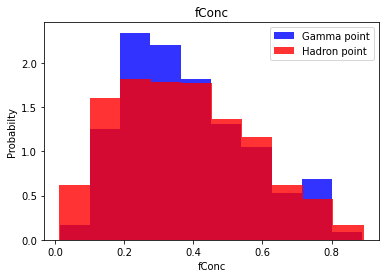

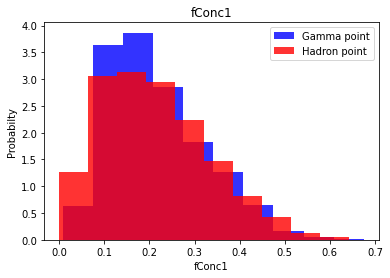

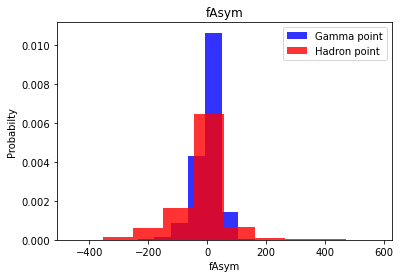

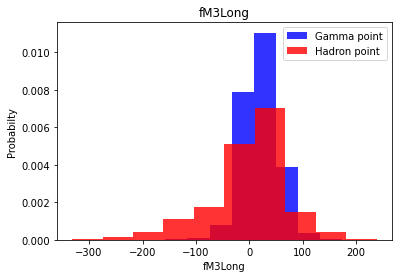

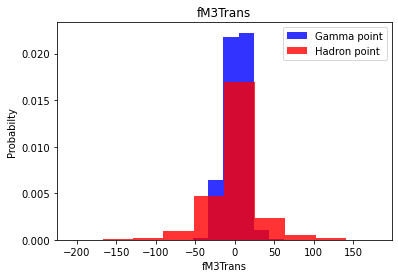

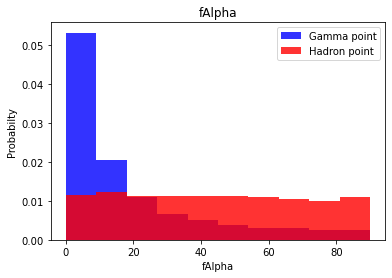

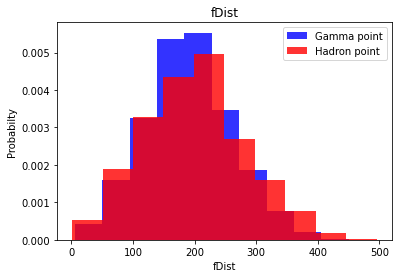

In [56]:
# Print histogram for the group (1 & 0)
# NB: cols[:-1] means plot till the last column and alphais transparency
for unique in cols[:-1]:
    plt.hist(df[df['class']==1][unique], color='blue', label='Gamma point', alpha=0.8, density=True)
    plt.hist(df[df['class']==0][unique], color='red', label='Hadron point', alpha=0.8, density=True)
    plt.title(unique)
    plt.ylabel('Probabilty')
    plt.xlabel(unique)
    plt.legend()
    plt.show()

### Train Validation and Test Data Sets

In [57]:
# df.sample(frac=1) shuffles all the datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [58]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
#     hstack means take 2 arrays and stack them horizontally together (side by side)
    data = np.hstack((x, np.reshape(y,(-1, 1))))
    return data, x, y

In [59]:
# print(len(train[train['class']==1])) #gamma
# print(len(train[train['class']==0]))

In [60]:
# train, X_train, Y_train = scale_dataset(train, oversample=True)

In [61]:
# len(Y_train)
# sum(Y_train == 1)
# sum(Y_train == 0)

In [62]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#### (KNN: K- Nearest Neighbour)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn_model.predict(x_test)
# y_pred
# y_test

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1332
           1       0.86      0.87      0.86      2472

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb_model = GaussianNB()
nb_model  = nb_model.fit (x_train, y_train)

In [69]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1332
           1       0.74      0.90      0.81      2472

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic(Log) Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lg_model = LogisticRegression()
lg_model  = lg_model.fit (x_train, y_train)

In [72]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1332
           1       0.84      0.82      0.83      2472

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## SVM 

In [73]:
from sklearn.svm import SVC 
# svc = support vector classifier

In [74]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [75]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1332
           1       0.88      0.91      0.90      2472

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



## Neural Network

In [76]:
import tensorflow as tf

In [77]:
""""def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()"""

'"def plot_loss(history):\n    plt.plot(history.history[\'loss\'], label=\'loss\')\n    plt.plot(history.history[\'val_loss\'], label=\'val_loss\')\n    plt.xlabel(\'Epoch\')\n    plt.ylabel(\'Binary crossentropy\')\n    plt.legend()\n    plt.grid(True)\n    plt.show()\n    \ndef plot_accuracy(history):\n    plt.plot(history.history[\'accuracy\'], label=\'accuracy\')\n    plt.plot(history.history[\'val_accuracy\'], label=\'val_accuracy\')\n    plt.xlabel(\'Epoch\')\n    plt.ylabel(\'Accuracy\')\n    plt.legend()\n    plt.grid(True)\n    plt.show()'

In [78]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()


In [79]:
# plot_history(history)

In [80]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, 
    verbose = 0
    )
    
    return nn_model, history

In [81]:
# history = nn_model.fit(
#     x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, 
#     verbose = 0
# )

In [82]:
# plot_loss(history)
# plot_accuracy(history)

16 nodes, dropout 0, lr 0.01, batch 32 


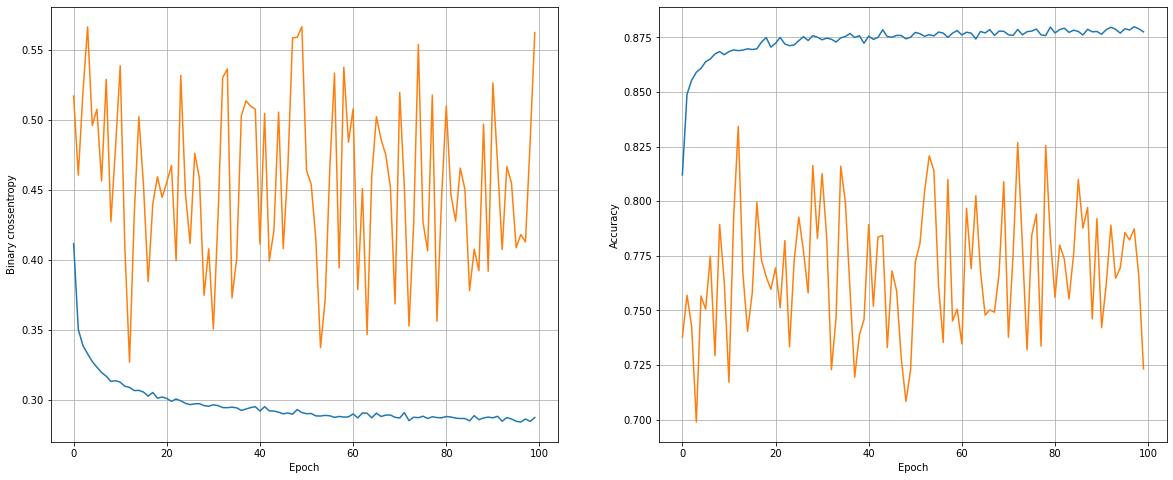

119/119 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.01, batch 64 


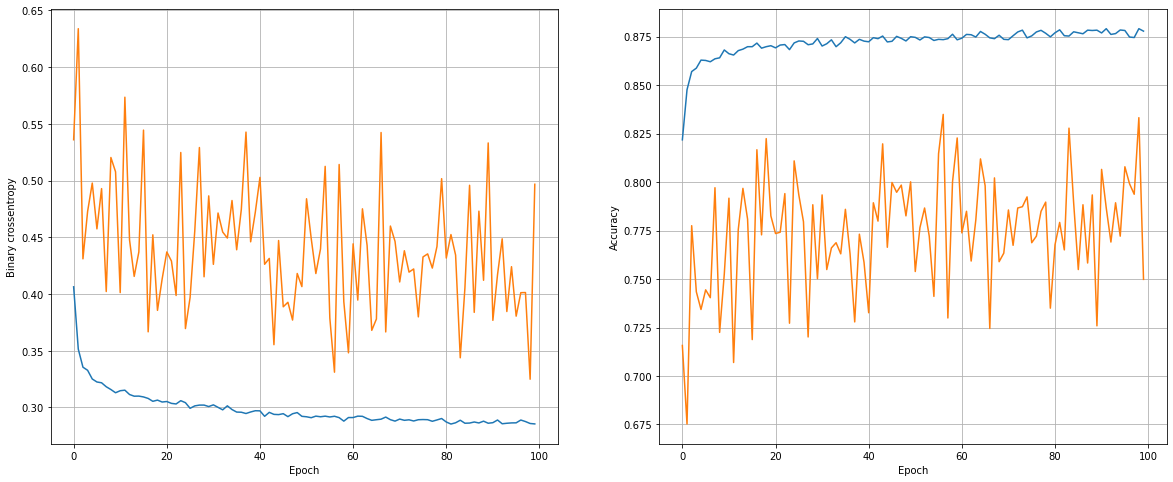

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8654
16 nodes, dropout 0, lr 0.01, batch 128 


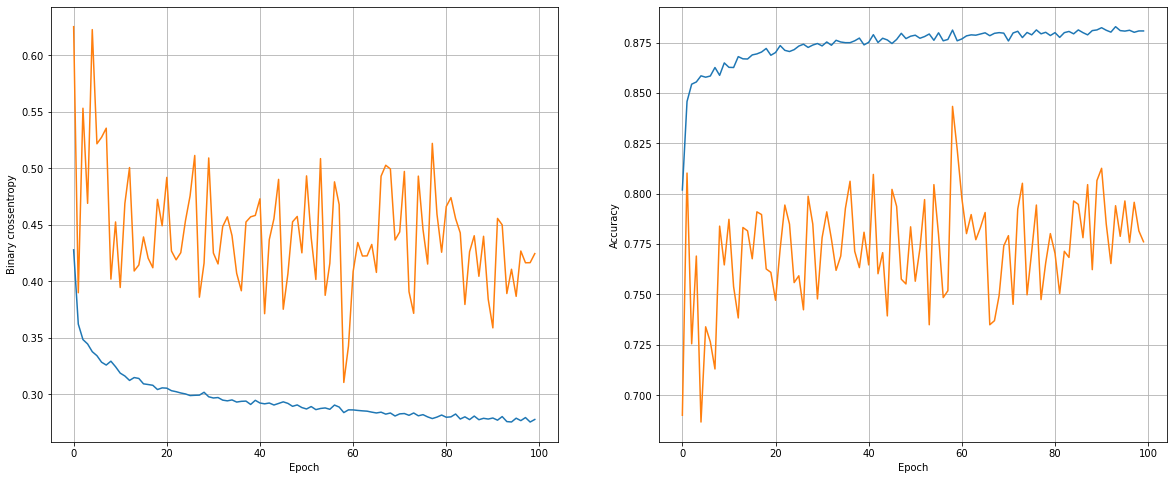

119/119 [==============================] - 1s 5ms/step - loss: 0.3222 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.005, batch 32 


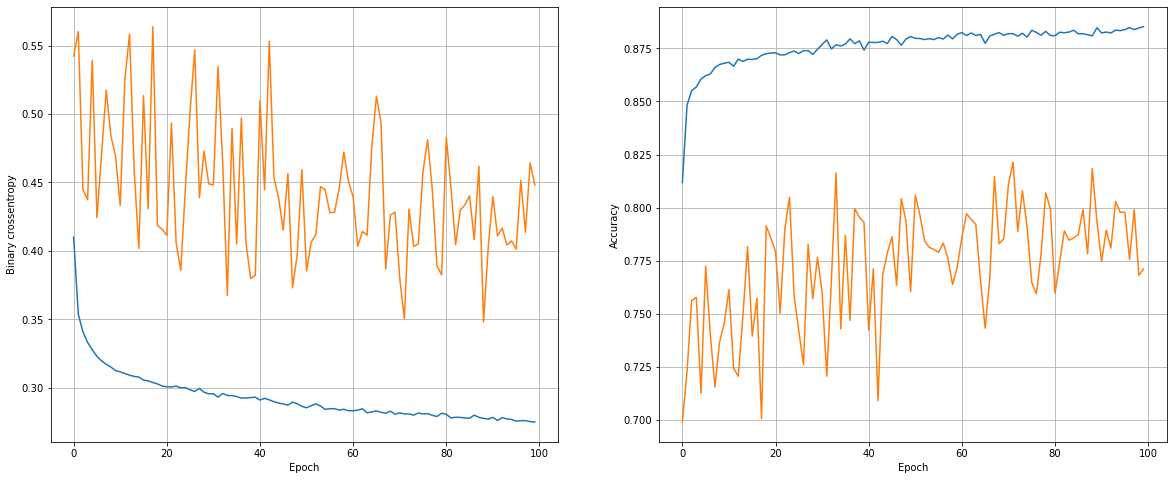

119/119 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.005, batch 64 


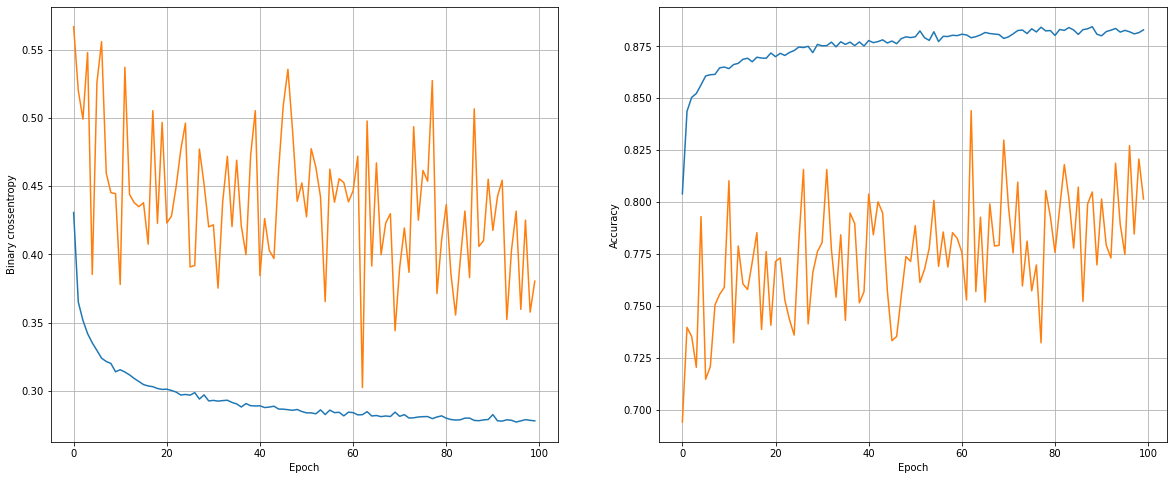

119/119 [==============================] - 1s 5ms/step - loss: 0.3162 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.005, batch 128 


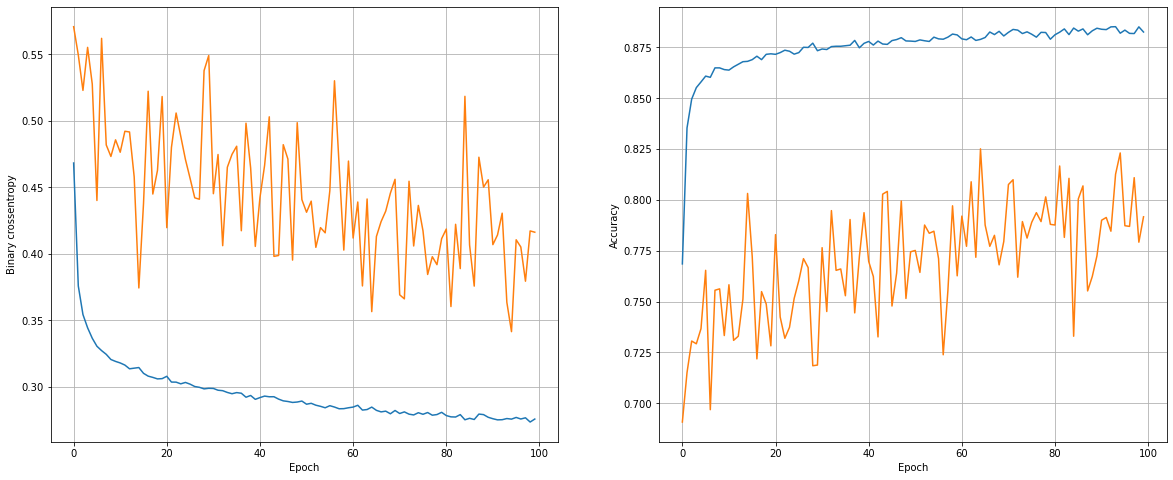

119/119 [==============================] - 1s 5ms/step - loss: 0.3182 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.001, batch 32 


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch {batch_size} ")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
#                 if val_loss<least_val_loss:
#                     least_val_loss = val_loss
#                     least_loss_model = model